# Build a Simple Web App to Classify US 50 Dollar & 100 Dollar Bills
### From model to production using Jupyter notebook

You have a 50 dollar or 100 dollar bill, something about this bill is raising concern, you would like to check if the bill is a counterfeit or not, would it not be convenient if you had an application where you could upload a picture of the bill and get an instant result? What if you could build one for yourself? You could argue why would anyone build such an app when there is plenty of free ones in the market already. Well, that brings us to the topic of artificial intelligence and deep learning. This post is not about whether an app or an idea is original, it is about demonstrating how you can create useful models and deploy it on the web using <a href="https://docs.fast.ai/" target="_blank">fastai</a> deep learning library and voila. In this tutorial, I am going to share how I built my own US Bank note classifier and by following the instructions you can perhaps, build an even better one or give life to your unique ideas. Having said that, the code and instructions I am going to provide might work for similar problems, however, the same code and technique is not a one fit for all solution.

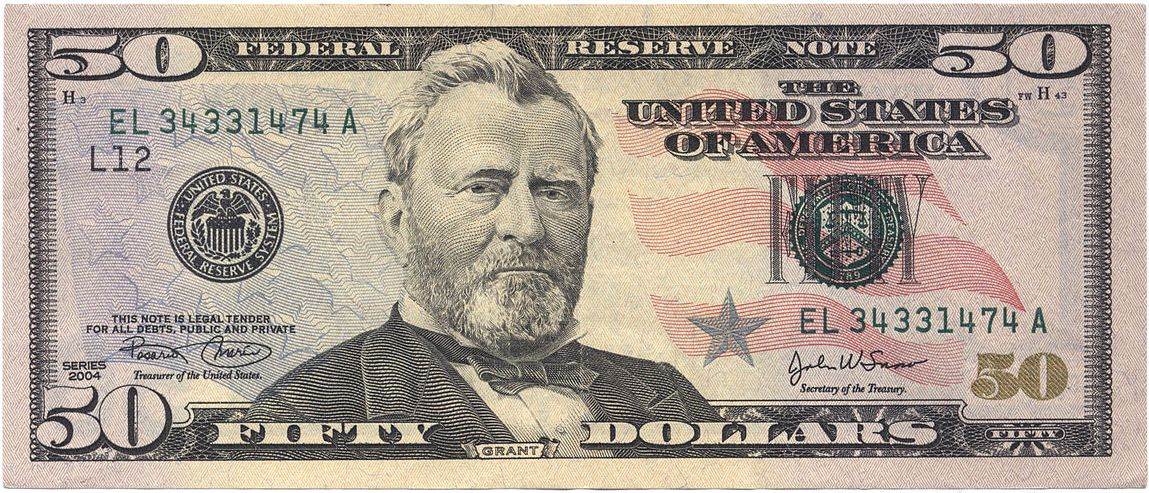

#### Deep Learning Model

In context to this 50 dollar and 100 dollar classification model, the model is going to classify or predict whether an image is that of a 50 or a 100 US dollar bill, just like we humans can tell the difference or identify objects using our vision. For instance, a child looking out of a window upon seeing a bird can instantly recognize the feathers, the beak, the features associated with the **label** "bird". The child has seen birds before, two important aspects from the child's recognition or identification mechanism of the bird: 1) the features of the bird such as feather, beak, wings, shape, color etc. and 2) the **label** "bird" associated with those features. Similarly, the model is provided data in the form of images with labels - "50 dollar" or "100 dollar" and then learns the features of those images, such as edges, color, gradient etc. Once the model has learnt from the data, when presented with an image not included in the learning data it can still recognize the object! Let's assume we provide the model 100 images of each kind, a total of 200 images with labels. Then we can ask the model (provide parameters in the form of coding) to take 80 images of each kind (label) to learn the features from (the 80 images of each kind, total of 160 images is called **training data**) and set aside the rest which the model has not seen (the group of unseen images  is called **validation set**). Validation set is used to check how much the model has learnt. How to test if the model is accurate? There are methods that can be applied to verify the calibre of the model. We will be examining such methods as we proceed. The process of distinguishing images using labels is called classification. Deep learning is a subset of AI which is based on the functionality of the human brain. We have billions of neurons in our brain which send signals, information to each other that allow us to comprehend our surroundings. Deep learning models utilize data to detect objects, speech, language and make decisions without human supervision. For our model we will use CNN or convolutional neural network. In a nutshell, a neural network consists of artificial neurons packed togather in layers. Each layer consists of numerous neurons which break down the image into really small portions and look for patterns, each of these neurons are connected to all the neurons in the next layer so that they can pass the information they picked up. Layer by layer, the neurons put all the pieces togather and create a meaningful image (see Figure 1 below). CNN's are applied for image classification problems and the good news is that you do not have to create any algorithm, the computer does all the calculations for you! 

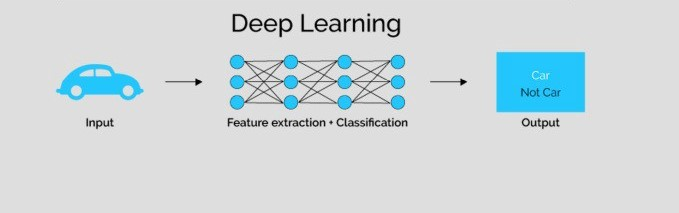

                                          Figure 1: Demonstration of a neural network.


I have tried to provide a 10,000 foot level view of these concepts, to really grasp a full understanding of these concepts, I suggest you to explore the numerous online resources and books that are available. I can recommend visiting:<a href="https://www.fast.ai/" target="_blank">Fast.ai</a> which is one of the best free courses on deep learning available. Although the course is targeted for those who already have some coding experience, it is also a great course for novice folks to get an overall understanding.


#### Capabilities and Limitations

This model we are going to create would be a great excercise to understand some of the capabilities and limitations of this technology. As mentioned earlier, the CNN model we are going to apply to classify the 50 dollar and 100 dollar bill will require data in the form of images that has labels. The potency of the model will depend very much on the data that we provide. A banknote has a lot of intricate details such as holograms and features that are only visible under ultra violet light. That means you would either have to take pictures that bring those features in view or find datasets that have those types of images. I have not used such images, I am going to provide instructions exactly how I created the model and deployed it on the web. But you can already guess there is a lot of opportunities for you to tweak and improvise the model as well can estimate some of the challenges and constraints related to this technology. Too much or too little data is another constraint, known as overfitting, that can lead to inefficient models. So what happens when you provide the model with images that are totally different from the ones that you used for training the model? The model will not do a good job with it's prediction, e.g. when training a model with colored images, feeding black and white images for classification may highlight deficiency. The model can only recognize what it has seen or draw parallels to similar images and objects . However, my model has achieved remarkable results with the data I have provided. Enough with the theoretical stuff, now let's get started!


#### Setting up the Environment

I am providing instructions exactly the way I have created and deployed this model. There are other ways of achieving the same result. Since this is a deep learning model which uses a deep learning library, you will need an NVIDIA GPU (graphics processing unit) on your computer, however, I used and recommend using a GPU server.

1. Step1: Create a free Paperspace Gradient account, follow the <a href="https://course.fast.ai/start_gradient" target="_blank">Instructions</a>.
       Once account is created, create a Jupyter Notebook folder for your project and a Notebook document/IPYNB file.
2. Step2: Create a free <a href="https://www.microsoft.com/en-us/bing/apis/bing-web-search-api" target="_blank">Microsoft Azure</a> account. 
       Once account is created, you will get an API key, save it somewhere for later use, very important!
       

**Download Images**

Copy the Bing Image search API key from your Microsoft Azure account from step2 above and paste it where it says **Paste your API key here** area:

*Note: You will use the Bing Image search API key to search for labeled images and download them to your notebook. The downloaded images will be your dataset.* 

**Packages**

Use the following code to import packages:

In [2]:
import fastbook
fastbook.setup_book()
from fastbook import *
from ipywidgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'Paste your API key here')

Use the function below to search for images in bing:

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

Use the code below to download images of 50 dollar and 100 dollar bills:

In [5]:
#This will successfully download the URLs of images that Bing Image Search finds for that search term).

results = search_images_bing(key, '50 dollar bill')
ims = results.attrgot('content_url')
len(ims)

#Use fastai's download_images to download all the URLs for each search term and put each in a separate folder:

bill_types = '50 dollar','100 dollar'
path = Path('bills')

if not path.exists():
    path.mkdir()
    for o in bill_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bill')
        download_images(dest, urls=results.attrgot('contentUrl'))

Check your folder to make sure it contains image files by using the code below

In [ ]:
fns = get_image_files(path)
fns

Output:

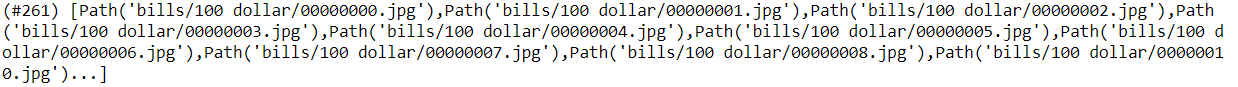

Sometimes files downloaded from the internet may be corrupt, to check for such file use the code below:

In [1]:
failed = verify_images(fns)
failed

To remove any failed or corrupt images, use the code below:

In [8]:
failed.map(Path.unlink);

**DataLoaders & DataBlock**
The images that we downloaded are stored in folders as you have seen in the previous steps. To make this data available to the model, a DataLoaders object needs to be created. DataLoaders is a fastai class. To convert the downloaded data into a DataLoaders object we need to tell fastai at least four things:

What kinds of data we are working with?
How to get the list of items?
How to label these items?
How to create the validation set?

To customize the DataLoaders, we will use something called the DataBlock API, below is the code for the customization of the DataLoaders using a DataBlock (check comments in the code understand each argument).

In [9]:
bills = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

#blocks=(ImageBlock, CategoryBlock) - kind of data we are working with, defines independent and dependent variables
#get_items=get_image_files - gets the list of items, defining path to get images
#splitter=RandomSplitter(valid_pct=0.2, seed=42) - creating the validation set, splits training and validation set(20%)
#get_y=parent_label - labeling procedure, provides image labels based on the folder they are in
#item_tfms=Resize(128) - makes all the images of the size 128x128

Use the bills DataBlock to point towards the directory of the images using the code below:

In [10]:
dls = bills.dataloaders(path)

DataLoders processes few items at a time in batches and provides it to the GPU. Dataloaders has training and validation DataLoaders, to look at a few of the items use the code below:

In [24]:
dls.valid.show_batch(max_n=20, nrows=5)

Output:

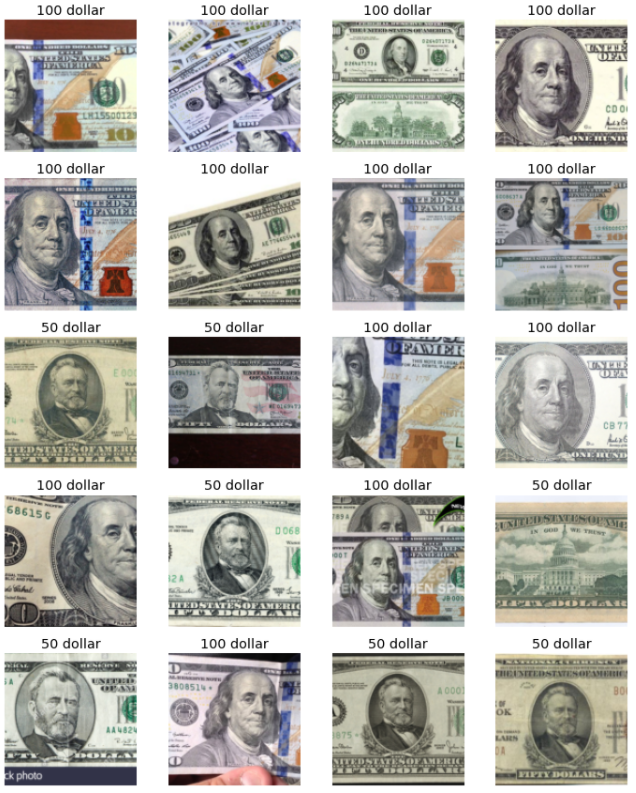

**Data Augmentation**

There are multiple techniques that can be applied using fastai functions which can manipulate the images such as squishing, padding them etc. But these techniques may cause loss of key features. For example, if we squish or pad a picture of a 100 dollar bill might result in loss of key features or make the bill appear different to an actual one which in turn will reduce the model accuracy. I am only going to provide the technique I used to create my model. Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that work pretty well are provided with the aug_transforms function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. Here is an example of what I just described above, we use RandomResizeCrop. The most important parameter to pass in is min_scale, which determines how much of the image to select at minimum each time. Use the code below to see samples:

In [25]:
bills = bills.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bills.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Output:

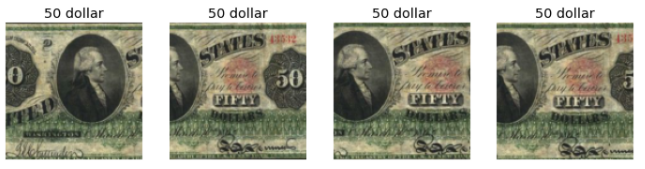

We used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform. This is a specific example of a more general technique, called data augmentation. We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use RandomResizedCrop with an image size of 224 px, which is fairly standard for image classification, and default aug_transforms:

In [13]:
bills = bills.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bills.dataloaders(path)

**Model**

Now that we have our data ready, we can train and test our model. We need to create a learner, which will use the function cnn_learner which requires a dataset, in our case it's **dls**, an architecture, we will be using a pretrained neural network with 18 layers called **resnet18**, and a metric, which will be error_rate, gives us the percentage of incorrect classifications. Use the code below to create the learner:

In [29]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Now you should see some statistics like this:

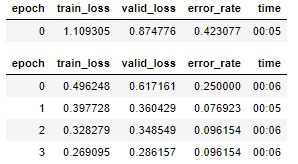

The **epochs** are the number of iterations the model has gone through the training data. As mentioned earlier, **error_rate** is the key metric for our model accuracy (accuracy = 1-error_rate). On the last iteration, the error_rate is 0.096154 which means accuracy is 1-0.096154 = 0.903846 or **90.3%** which is pretty good! Loss is the error over training set. There is a distinction between loss and erro_rate, the entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. Weights and gradient descents are some important aspects of a neural network which I will probably cover in another blog post.

*Note: your epoch results may vary*

We will use another method to examine the mistakes the model has made, we will use a **confusion matrix**. Use the code below to run the confusion matrix:

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Now you should see a matrix like this:

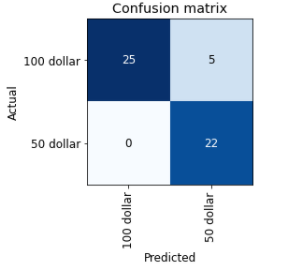

The rows represent 100 dollars and 50 dollars from our data and columns represent the predictions. The diagonal cells give the correct predictions and off-diagonal cells give the error. All 50 dollar predictions were correct, 5 mistakes were made in case of 100 dollars.

Use the code below to see the images where the model made incorrect predictions.

In [26]:
interp.plot_top_losses(4, nrows=1)

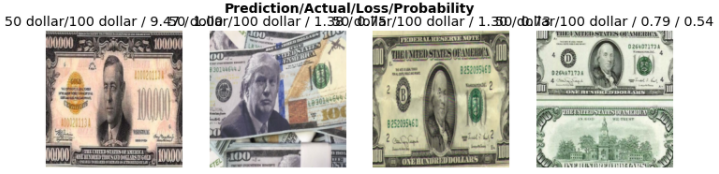

Oops! One of the 100 dollar bills has Donald Trump on it! No wonder why the model made an error!

Next, you can choose to delete the images of the incorrect predictions using the code below:

In [27]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

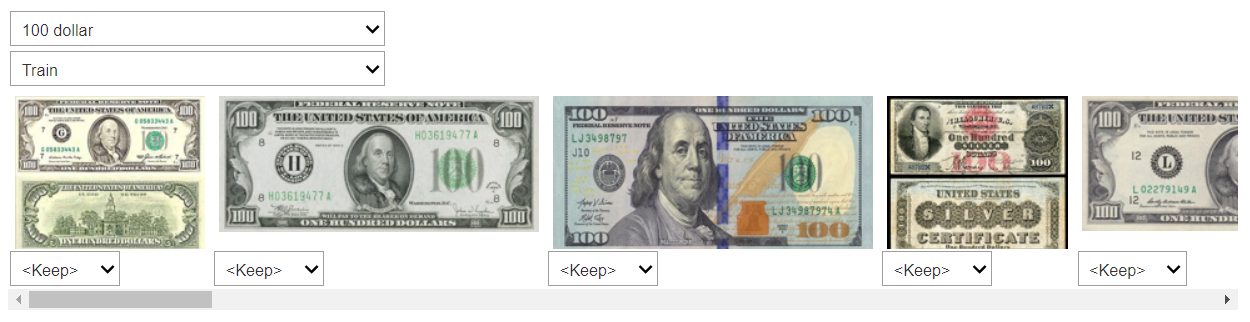

Once you have decided to make changes, keep or delete images, run the code below:

In [49]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

**Turn Your Model into an Application**

Once you have successfully completed all the steps above, your model will be ready to be turned into an actual application which anyone can access and use. To convert the model into a app, you will first need to export your model as a **.pkl** Use the code below to create your .pkl file, this file should appear on your project folder:

In [18]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Now that you have a trained model and a .pkl file, we just need to create an **inference** to get predictions. Use the code below to create an inference:

In [19]:
learn_inf = load_learner(path/'export.pkl')

Use the code below to create an upload button using a GUI component called <a href="https://ipywidgets.readthedocs.io/en/stable/" target="_blank">ipywidgets</a> :

In [20]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

After executing the code, you should see an upload button like this:
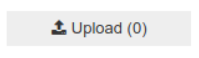
You can use this upload button to upload image files from your device for prediction. If you have a 50 dollar bill or 100 dollar bill, take a picture and upload it from your computer to test the model, or you can download random 50/100 dollar images from the internet for testing as well. Only 50 or 100 dollar images will yield in meaningful results. Use the following code to display the image you uploaded.

In [30]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()

with out_pl: display(img.to_thumb(128,128))
out_pl

I uploaded a 100 dollar image, your uploaded image should appear like this:
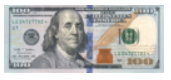
To get predictions of the image using labels, use the following code:

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

The output should be something like this:

The model has predicted that the image I uploaded is a 100 dollar with 94.78% accuracy! Hooray! the model works and now it's turning into an app! Next step is to install <a href="https://voila.readthedocs.io/en/stable/using.html" target="_blank">voila</a>, voila is a python library that converts jupyter notebooks into web applications by hiding the code cells and only diplaying the widget buttons and outputs. Use the following code to install voila:

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

**Convert Notebook into a Web Application**

Once you have successfully completed the above steps, open a **new** jupyter notebook document and only use the code below. The code only consists of what is necessary to create the app, that is widgets, event handler, inference calling the .pkl file, a vbox putting the widget and output togather. I used <a href="https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html" target="_blank">markdown</a> text to give a description of my app, use the following code to create your app: 

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from ipywidgets import *

#This is the markdown text I used

#The US 50 Dollar and 100 Dollar Indentifier!

# You have a 50 US dollar or a 100 US dollar bill on your hand, but want to make sure it is not a counterfit, all you need to do 
# is take a picture of the bill and **upload** it to get an evaluation.
# (Note: Only 50 US dollar or 100 US dollar bill will produce meaningful results, picture of anything else will not 
# yield meaningful results.)

path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_upload.observe(on_data_change, names=['data'])
display(VBox([widgets.Label('Select 50 or 100 dollar bill!'), btn_upload, out_pl, lbl_pred]))



**Deployment**

Once you have completed all the steps above, you can share your app with the world! You can also do it for free. This app will only work on desktops with my instructions and not on smart phones. Follow the steps below for deployment:

1. Create a [GitHub repository](http://github.com/).
2. Add the notebook (the one with the application) to your Git repository.
3. Add the .pkl file and create a requirements file.
4. Navigate to [Binder](https://mybinder.org/) to put everything togather.
5. Change the File dropdown to instead select URL.
6. In the "URL to open" field, enter `/voila/render/name.ipynb` (replacing `name` with the name of for your notebook).
7. Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe. 
8. Click Launch.

*Note: It takes a while for binder to build and launch*

I hope you enjoyed my post and congrats on building a deep learning model and deploying it !! 

I would like to end this post with a quote from Steve Jobs - **"Stay Hungry. Stay Foolish"** 

References:

<a href="https://docs.fast.ai/" target="_blank">fast.ai</a>
